### Przetwarzanie obrazów w dziedzinie przestrzennej
## Autorzy:
1. Jakub Rauk 256768
2. Michał Wróbel 259132
## Cwiczenie 5
Ćwiczenie polegało na przygotowaniu środowiska testowego umożliwiającego:
1. Wyświetlenie obrazu wczytanego z pliku o zadanej nazwie,
2. sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej lub pionowej o zadanej współrzędnej,
3. Wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego zapis do pliku o zadanej nazwie.

In [118]:
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

Funkcje do wczytania i wyświetlenia wczytanego obrazu

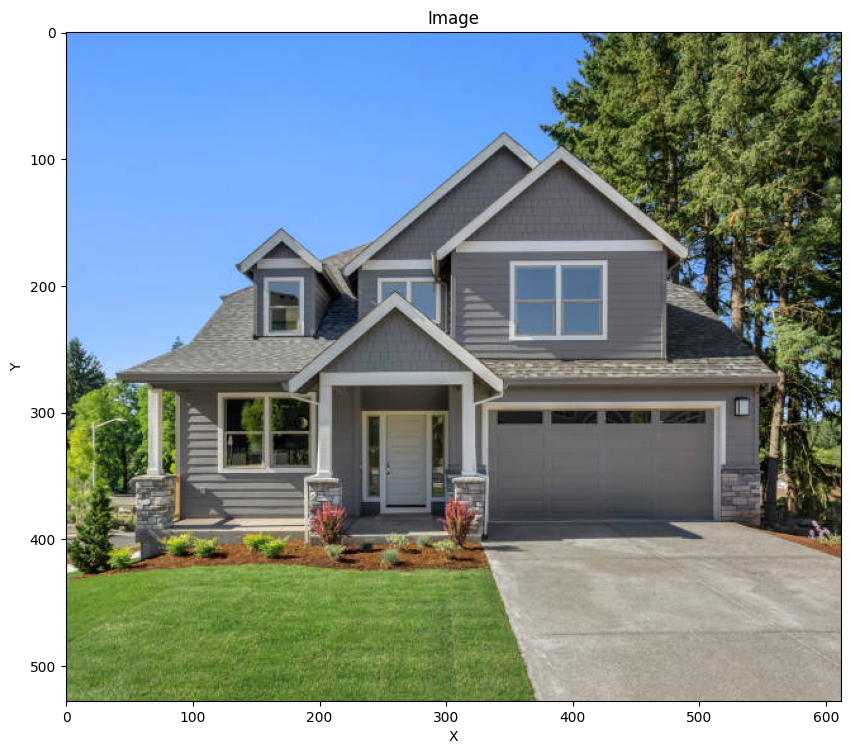

In [119]:
def load_image(file_name):
    _img = cv.imread(file_name)
    if file_name.split('.')[1] == 'jpg':
        _img = cv.cvtColor(_img, cv.COLOR_BGR2RGB)
    return _img

def display_image(image, x_size, y_size, x_label, y_label, title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(x_size, y_size))
    ax.imshow(image)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()

filename = input("Enter image file name: ")
image = load_image(filename)
display_image(image, 10, 10, 'X', 'Y', 'Image')


### Skala szarości

Wygenerowanie histogramu oraz wykresu zmian poziomu szarości wzdłuż wybranej linii poziomej lub pionowej o zadanej współrzędnej

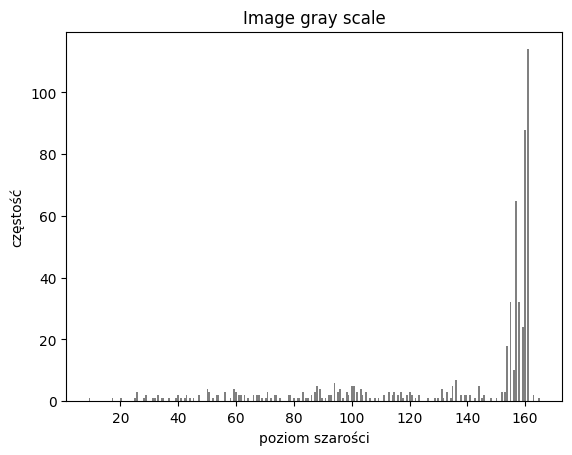

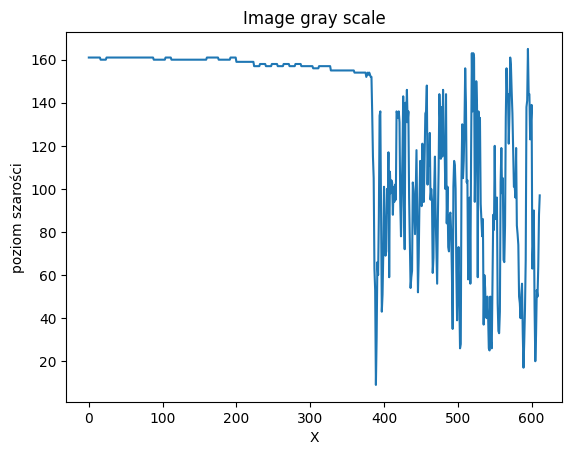

In [120]:
def hist_image_grayscale(image, line_type, coordinate):
    gray_scale_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    height, width = gray_scale_image.shape

    if line_type == 'horizontal':
        if coordinate < 0 or coordinate >= height:
            print('Invalid horizontal coordinate')
            return
        line = gray_scale_image[coordinate, :]
    elif line_type == 'vertical':
        if coordinate < 0 or coordinate >= width:
            print('Invalid vertical coordinate')
            return
        line = gray_scale_image[:, coordinate]
    else:
        print('Invalid line_type, valid are: vertical, horizontal')

    plt.hist(line, bins=256, color='gray')
    plt.xlabel('poziom szarości')
    plt.ylabel('częstość')
    plt.title('Image gray scale')
    plt.show()

def plot_image_grayscale(image, line_type, coordinate):
    gray_scale_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    height, width = gray_scale_image.shape

    if line_type == 'horizontal':
        if coordinate < 0 or coordinate >= height:
            print('Invalid horizontal coordinate')
            return
        line = gray_scale_image[coordinate, :]
    elif line_type == 'vertical':
        if coordinate < 0 or coordinate >= width:
            print('Invalid vertical coordinate')
            return
        line = gray_scale_image[:, coordinate]
    else:
        print('Invalid line_type, valid are: vertical, horizontal')

    plt.plot(line)
    plt.xlabel('X')
    plt.ylabel('poziom szarości')
    plt.title('Image gray scale')
    plt.show()


hist_image_grayscale(image, 'horizontal', 50)
plot_image_grayscale(image, 'horizontal', 50)

### Wycinek obrazu

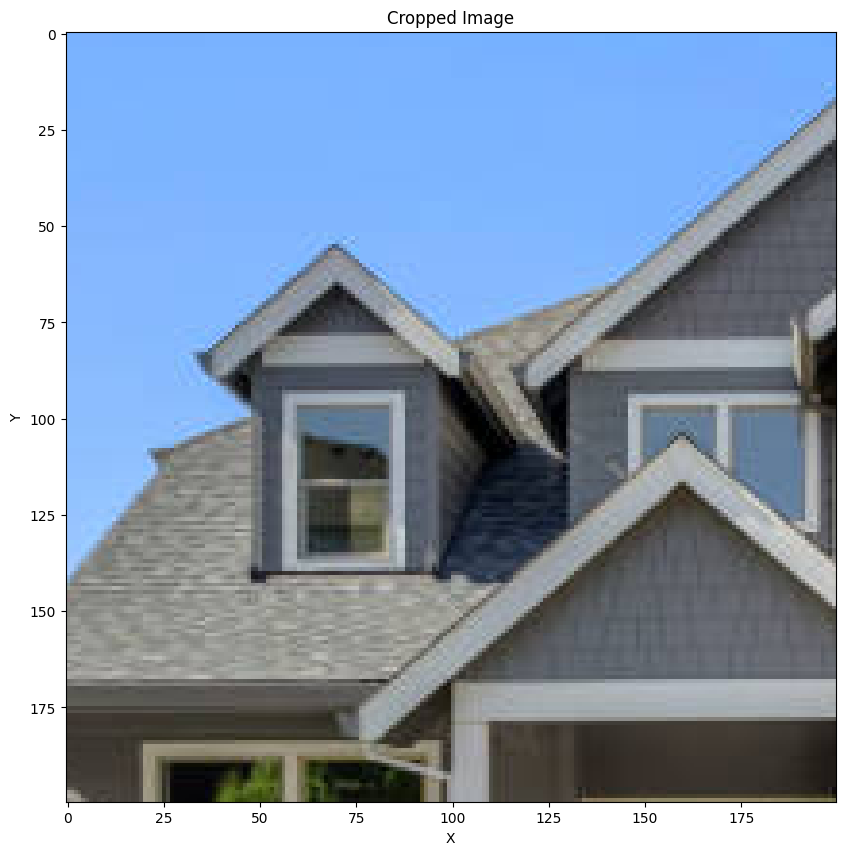

In [121]:
def crop_image(img, first_point, second_point):
    # points should be: list[x, y]
    cropped_img = img[first_point[1]:second_point[1], first_point[0]:second_point[0]]
    return cropped_img

def save_image(file_name, img):
    if file_name.split('.')[1] in ['jpg', 'png']:
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    cv.imwrite(file_name, img)

# first_point = [int(a) for a in input("Enter first_point coordinates (eg. 50,50): ").split(',')]
# second_point = [int(a) for a in input("Enter first_point coordinates (eg. 50,50): ").split(',')]

cropped_image = crop_image(image, [100, 100], [300, 300])
display_image(cropped_image, 10, 10, 'X', 'Y', 'Cropped Image')
save_image('wycinek.png', cropped_image)


## Cwiczenie 6
Przekształcenia punktowe
1. Mnożenie obrazu przez stałą T(r) = c * r, gdzie c jest stałą.
2. Zmiana dynamiki skali szarości (kontrastu)
3. Korekcja gamma Korekcję gamma, zdefiniowaną jako s = c · r^γ, gdzie c > 0 i γ > 0 są stałymi we wzorze przekształcenia

### Przemnożenie przez stałą

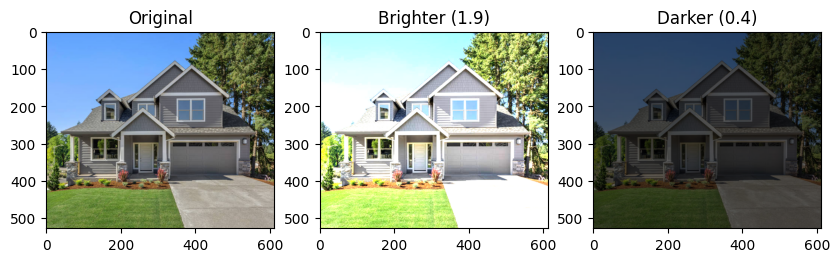

In [122]:
def multiply_image_by_constant(img, constant):
    multiplied_image = np.clip(img * constant, 0, 255).astype(np.uint8)
    return multiplied_image

brighter = 1.9
darker = 0.4

brighter_image = multiply_image_by_constant(image, brighter)
darker_image = multiply_image_by_constant(image, darker)
plt.figure(figsize=(10,15))
plt.subplot(131), plt.imshow(image), plt.title('Original')
plt.subplot(132), plt.imshow(brighter_image), plt.title(f'Brighter ({brighter})')
plt.subplot(133), plt.imshow(darker_image), plt.title(f'Darker ({darker})')
plt.show()


Jak widać na powyższych obrazkach przemnożenie przez stałą większą od 1 powoduje zwiększenie jasności obrazu, natomiast przemnożenie przez wartość z zakresu (0, 1) spowoduje zmniejszenie jasności.

### Modyfikacja kontrastu

/tmp/ipykernel_48516/894410427.py:6: RuntimeWarning: divide by zero encountered in divide
  result = 1 / (1 + (m / img)**e)


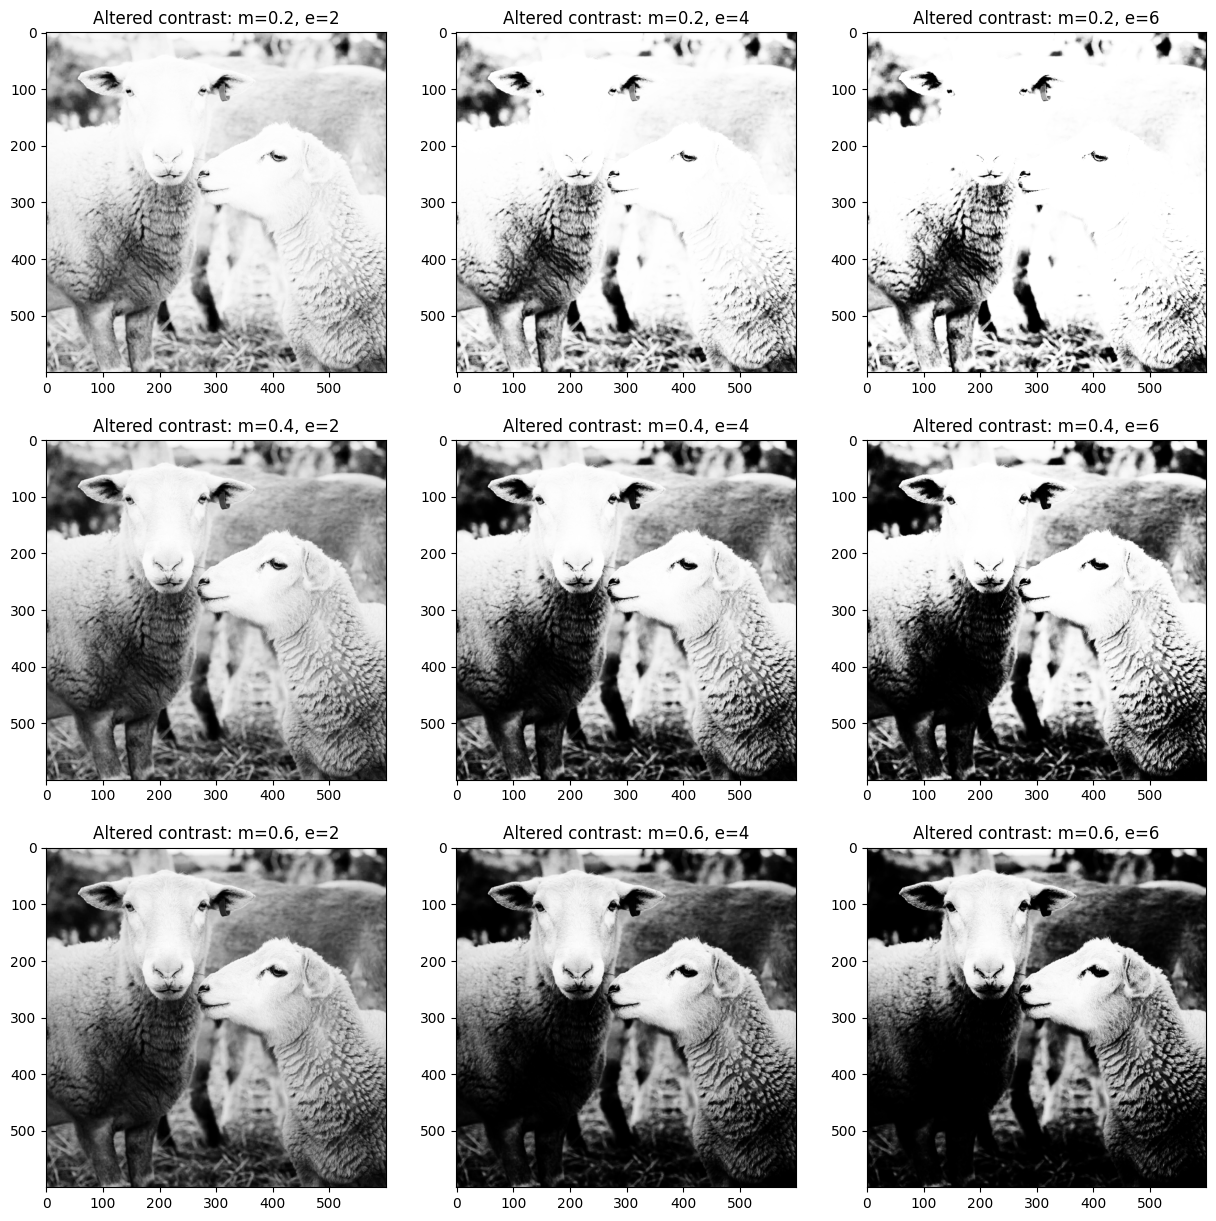

In [123]:
def transformation(_r, m=0.45, e=8):
    return 1/(1+(m/_r)**e)


def alter_contrast(img, m, e):
    result = 1 / (1 + (m / img)**e)
    result = (result * 255).astype(np.uint8)
    return result


elements = [int(f"33{i+1}") for i in range(0,9)]
parameters = [[i * 0.2, j*2] for i in [1,2,3] for j in [1,2,3]]

sheep_image = cv.imread('owce.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32) / 255

plt.figure(figsize=(15,15))
for i in range(len(parameters)):
    altered = alter_contrast(sheep_image, parameters[i][0], parameters[i][1])
    plt.subplot(elements[i])
    plt.imshow(altered, cmap='gray')
    plt.title(f'Altered contrast: m={np.round(parameters[i][0], 2)}, e={parameters[i][1]}')
plt.show()

### Modyfikacja Gamma

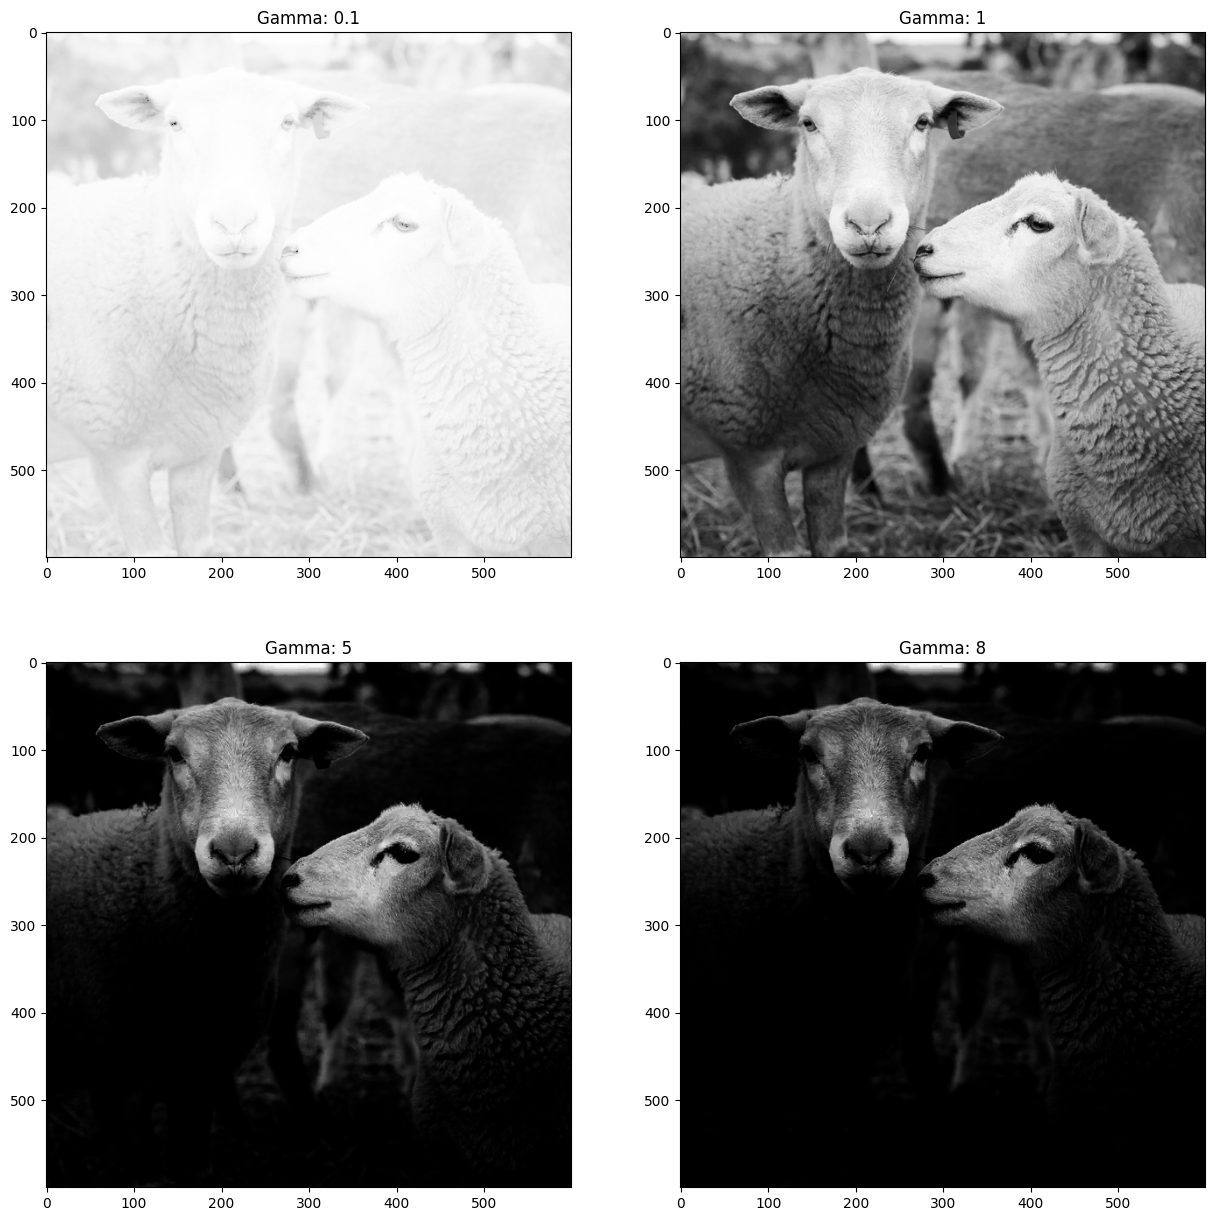

In [124]:
ncols, nrows = (2,2)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))


def gamma_correction(img, x):
    return np.power(img, x)


gammas = (0.1, 1, 5, 8)

counter = 1
for gamma in gammas:
    plt.subplot(int(f'{ncols}{nrows}{counter}'))
    plt.imshow(gamma_correction(sheep_image, gamma), 'gray')
    plt.title(f'Gamma: {gamma}')
    counter += 1
plt.show()

Zmiana współczynnika gamma zmienia jasność obrazu. Wartości z przedziału (0, 1) rozjaśniają obraz, a te większe od 1 powodują zaciemnienie. Ze względu na wykładniczą postać przekształcenia niewielki wzrost współczynnika gamma powoduje znaczące zaciemnienie.

## Ćwiczenie 7

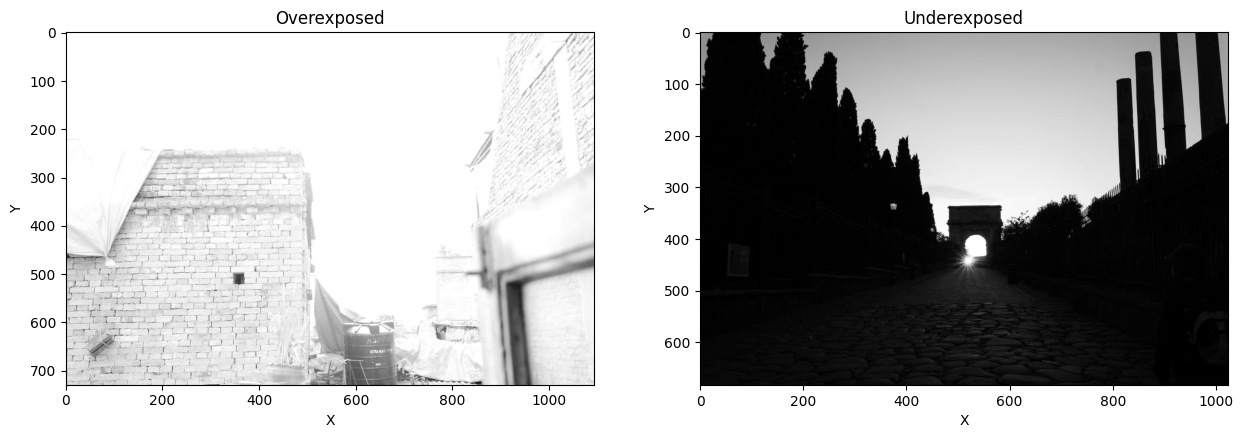

In [138]:
overexposed = cv.imread('overexposed.jpg', cv.IMREAD_GRAYSCALE)
underexposed = cv.imread('underexposed.jpg', cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,15))
plt.clf()
plt.subplot(221)
plt.imshow(overexposed, 'gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Overexposed')

plt.subplot(222)
plt.imshow(underexposed, 'gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Underexposed')

plt.show()


Aby efekty wyrównania histogramów były lepiej widoczne do eksperymentu wybrane zostały dwa zdjęcia jedno prześwietlone, a drugie niedoświetlone.

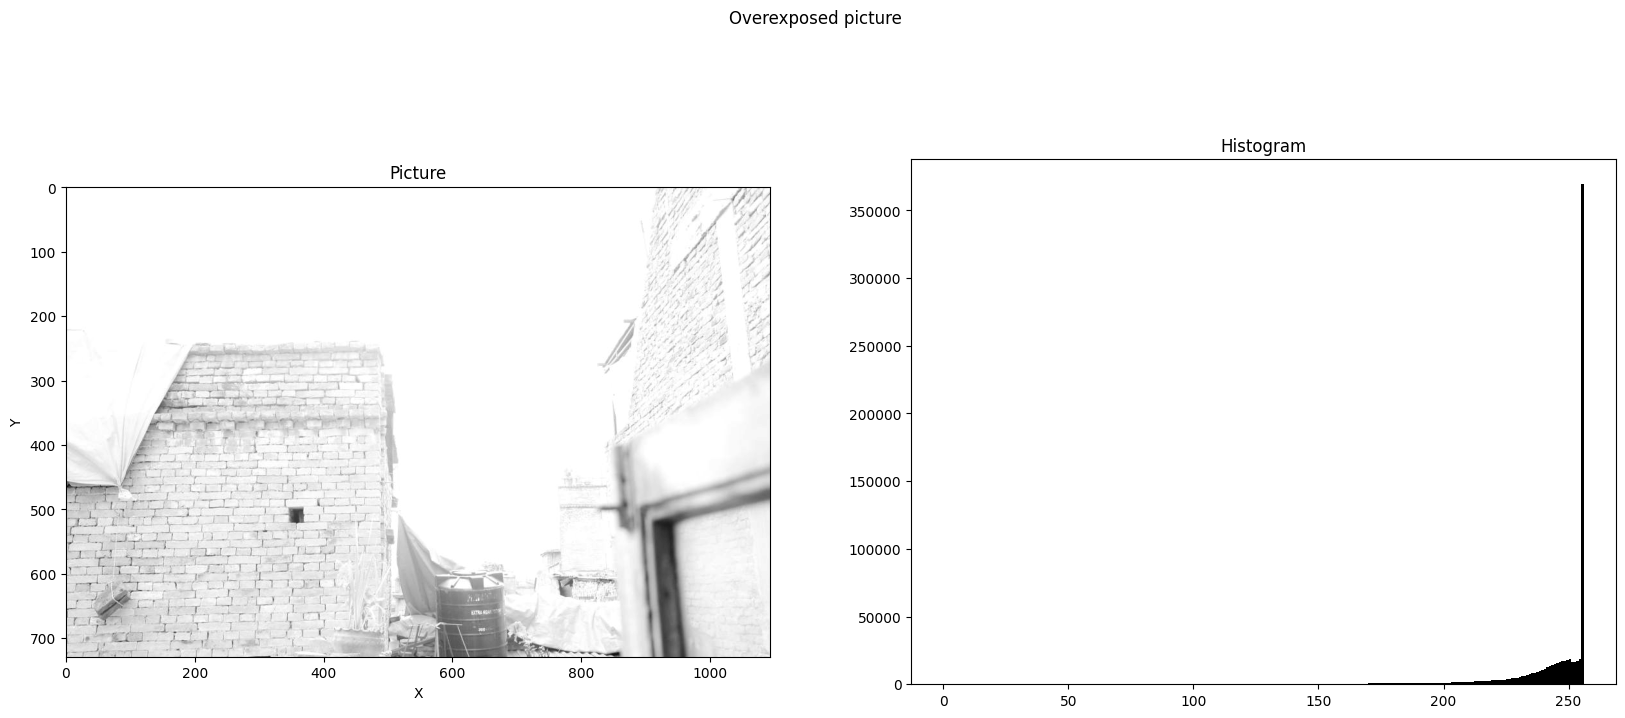

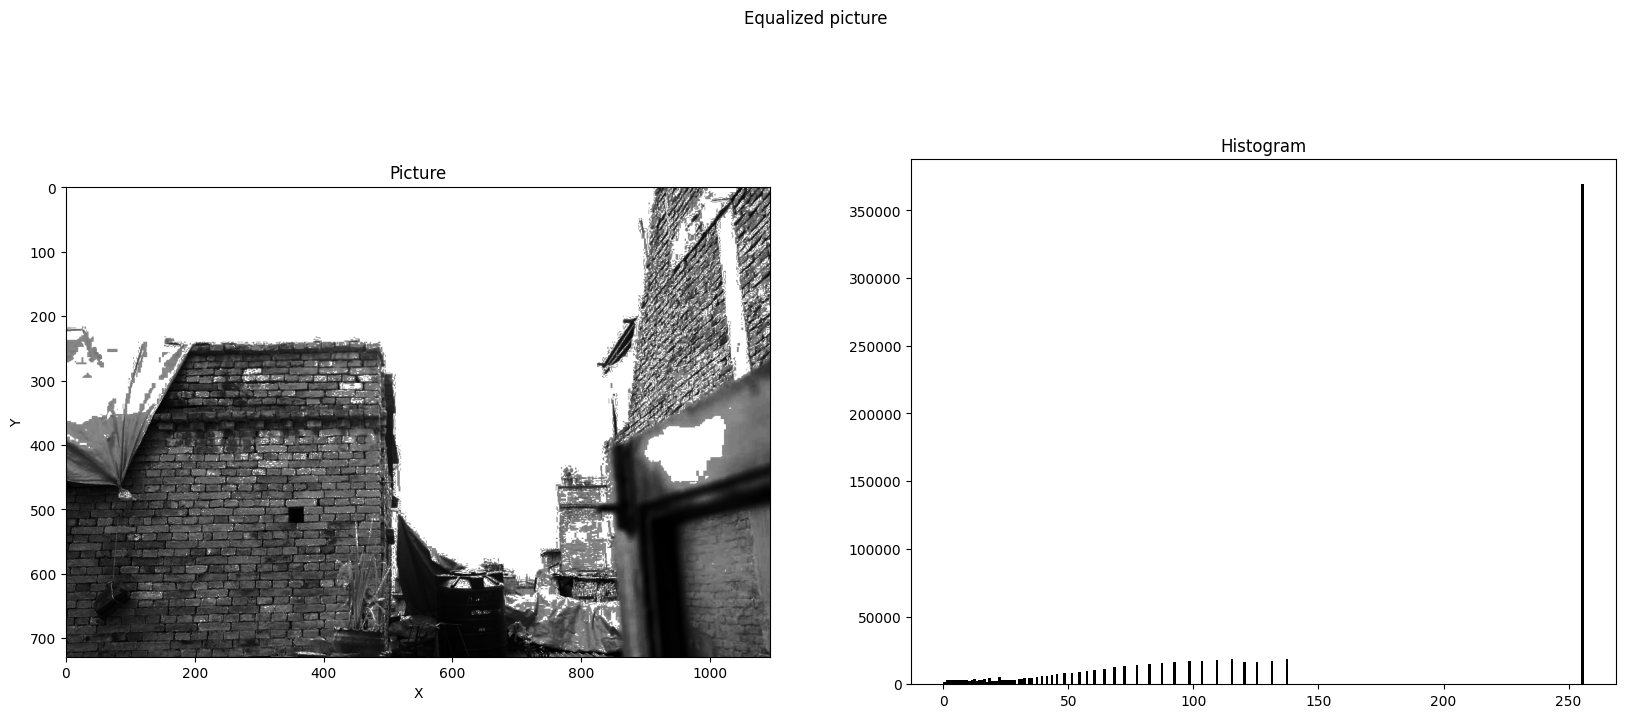

In [139]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,15))
plt.clf()
plt.subplot(221)
plt.imshow(overexposed, 'gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Picture")
overexposed.ravel()
plt.subplot(222)
plt.hist(overexposed.ravel(),256,[0,256], color='black')
plt.title("Histogram")
plt.suptitle("Overexposed picture")

eq_pic = cv.equalizeHist(overexposed)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,15))
plt.clf()
plt.subplot(221)
plt.imshow(eq_pic, "gray")
plt.title("Picture")
plt.xlabel('X')
plt.ylabel('Y')
eq_pic.ravel()
plt.subplot(222)
plt.hist(eq_pic.ravel(),256,[0,256], color='black')
plt.title("Histogram")
plt.suptitle("Equalized picture")

plt.show()

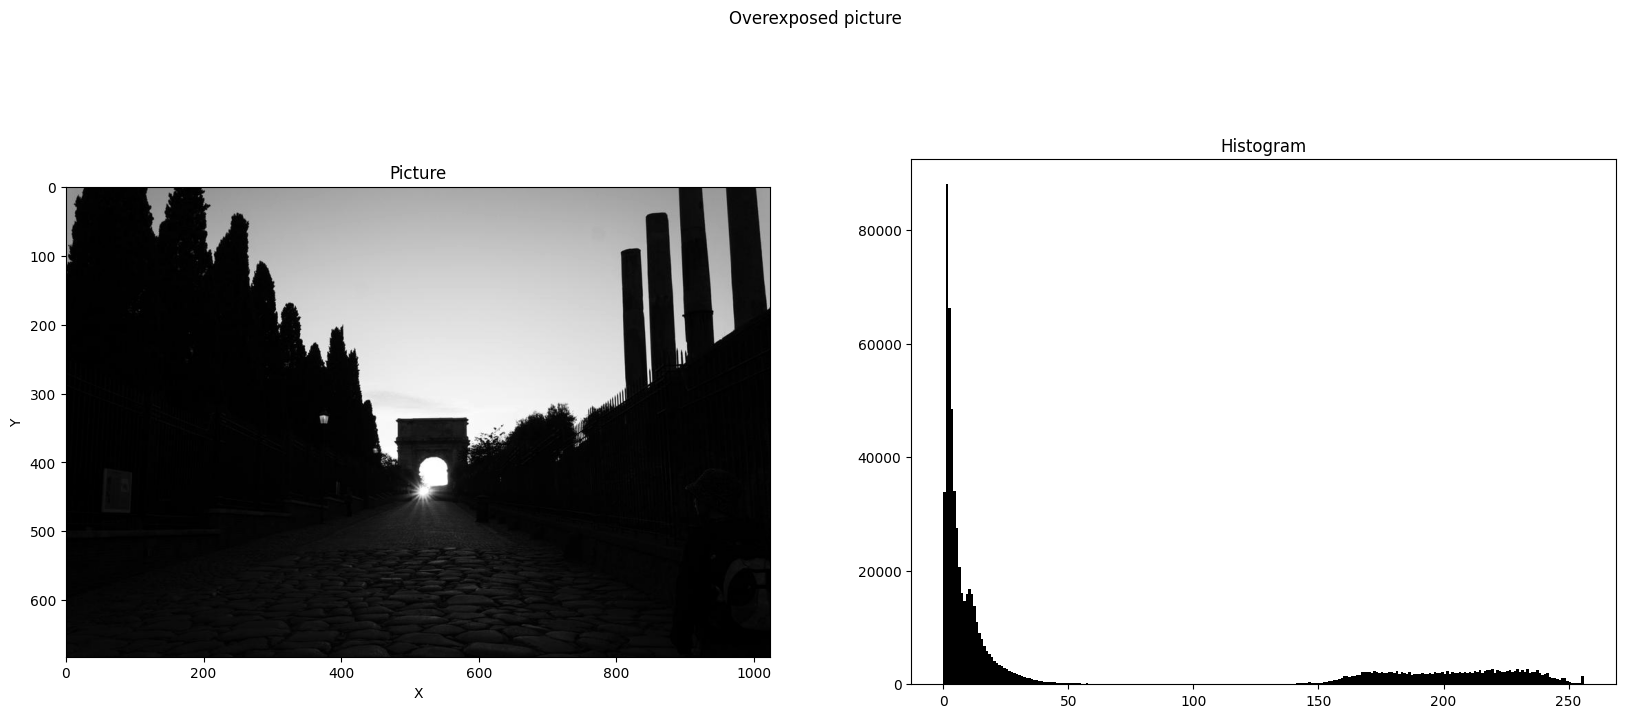

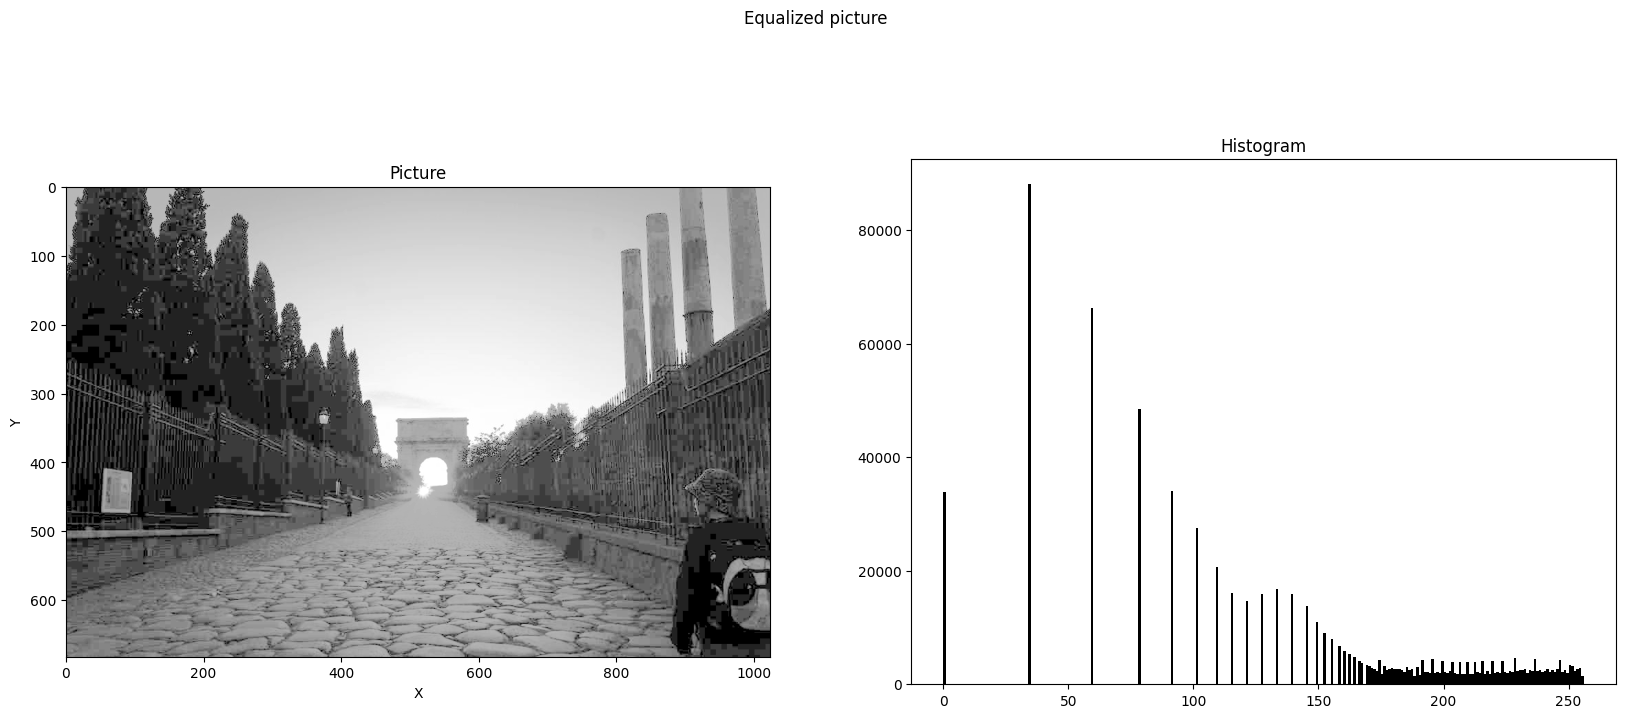

In [140]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,15))
plt.clf()
plt.subplot(221)
plt.imshow(underexposed, 'gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Picture")
underexposed.ravel()
plt.subplot(222)
plt.hist(underexposed.ravel(),256,[0,256], color='black')
plt.title("Histogram")
plt.suptitle("Overexposed picture")

eq_pic = cv.equalizeHist(underexposed)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,15))
plt.clf()
plt.subplot(221)
plt.imshow(eq_pic, "gray")
plt.title("Picture")
plt.xlabel('X')
plt.ylabel('Y')
eq_pic.ravel()
plt.subplot(222)
plt.hist(eq_pic.ravel(),256,[0,256], color='black')
plt.title("Histogram")
plt.suptitle("Equalized picture")

plt.show()

## Ćwiczenie 8

### Filtracja dolnoprzepustowa
Celem ćwiczenia była analiza skuteczności redukcji szumów typu "sól i pieprz" za pomocą liniowego filtra uśredniającego oraz nieliniowego filtra medianowego dla różnych rozmiarów masek.

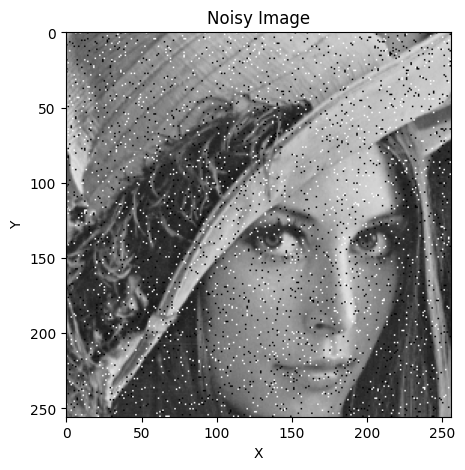

In [141]:
noisy_image = load_image('noisy_image.png')

display_image(noisy_image, 5, 5, 'X', 'Y', 'Noisy Image')

Operacje filtrowania będą przeprowadzone na powyższym obrazie

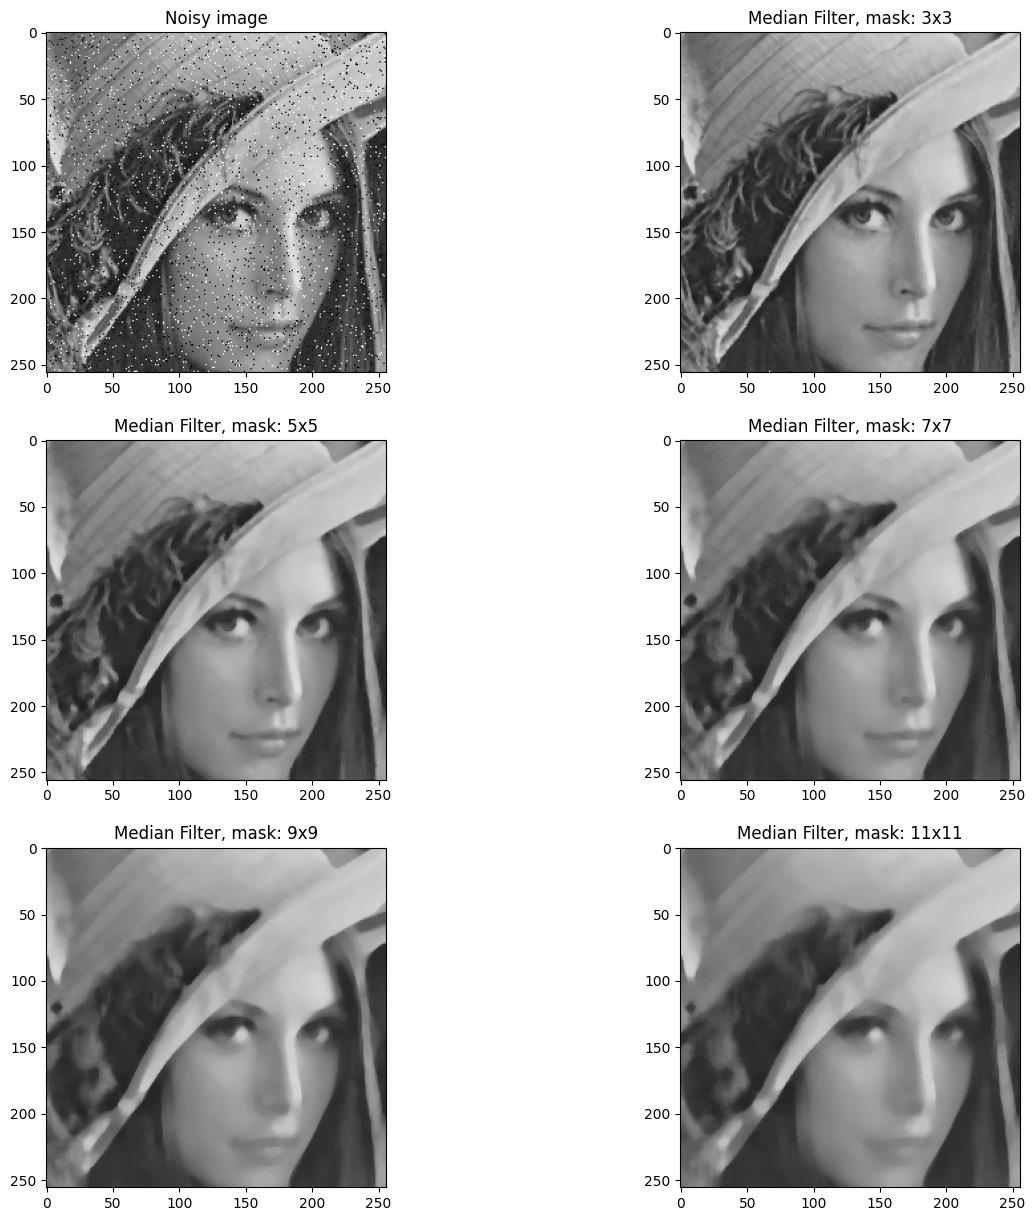

In [149]:
def low_pass_filtering(img, mask_size, f_type='Median Filter'):
    if f_type == 'Median Filter':
        blur = cv.medianBlur
    elif f_type == 'Mean Filter':
        blur = cv.blur
        mask_size = (mask_size, mask_size)
    result = None

    if blur:
        result = blur(img, mask_size)
    return result

masks = [3, 5, 7, 9, 11]

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
plt.subplot(321)
plt.imshow(noisy_image)
plt.title('Noisy image')

counter = 2
for mask_size in masks:
    plt.subplot(int(f'32{counter}'))
    plt.imshow(low_pass_filtering(noisy_image, mask_size, 'Median Filter'))
    plt.title(f'Median Filter, mask: {mask_size}x{mask_size}')
    counter += 1

plt.show()

Po wyniku filtracji obrazów widzimy, że im większy rozmiar filtra medianowego tym obraz wydaje się być bardziej "pastelowy". Rozmiar 3x3 pasuje idelanie do odszumienia tego typu zdjęcia, im większy tym tracimy więcej szczegółów.

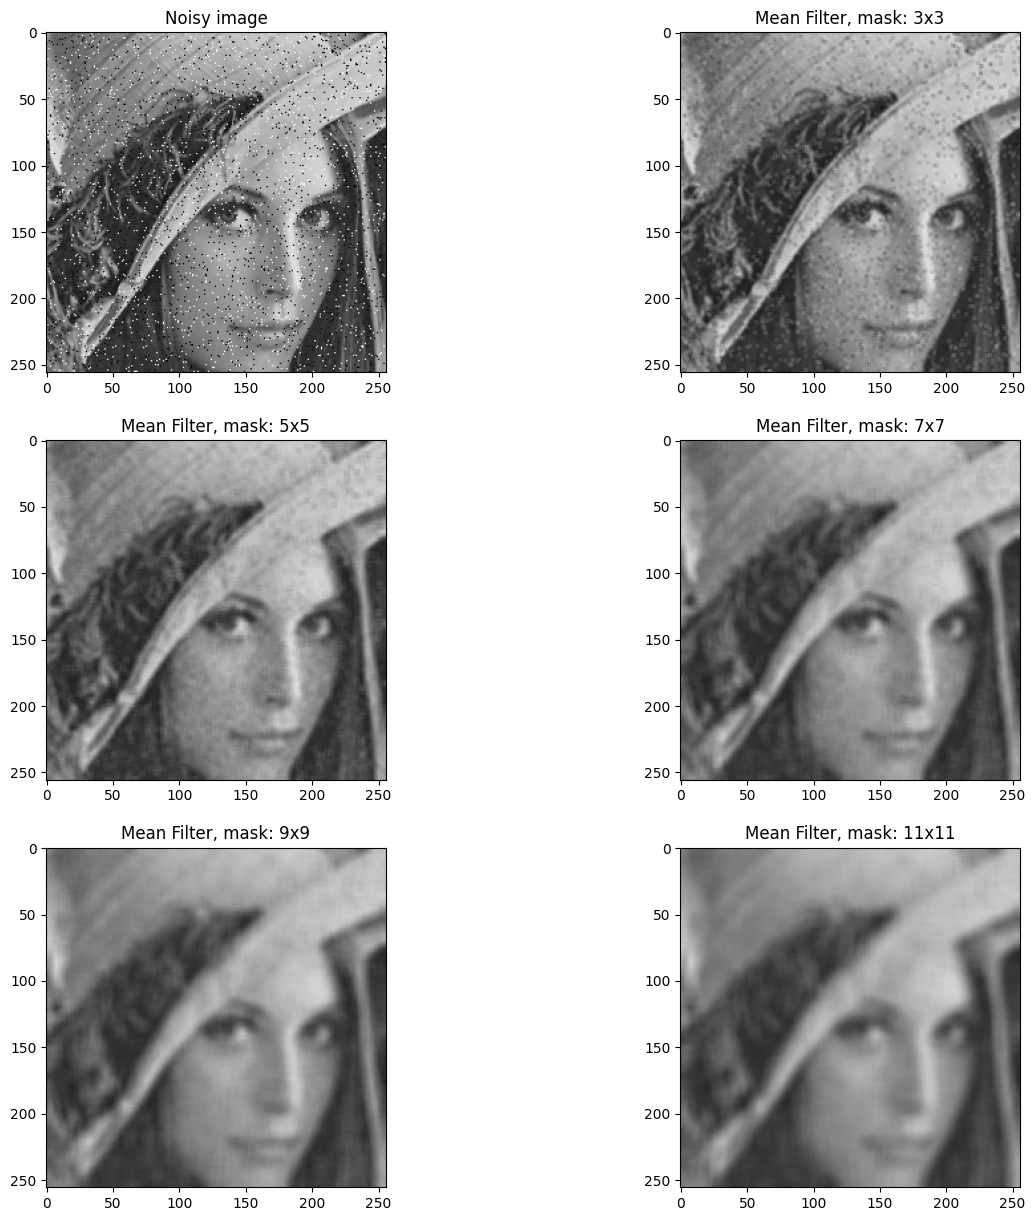

In [151]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
plt.subplot(321)
plt.imshow(noisy_image)
plt.title('Noisy image')

counter = 2
for mask_size in masks:
    plt.subplot(int(f'32{counter}'))
    plt.imshow(low_pass_filtering(noisy_image, mask_size, 'Mean Filter'))
    plt.title(f'Mean Filter, mask: {mask_size}x{mask_size}')
    counter += 1

plt.show()

Filtr liniowy spowodował znaczącą utratę ostrości, niekoniecznie usuwając zjawisko "soli i pieprzu" tak jak się to udało za pomocą filtra medianowego.